# Modeling Ridesharing Conditions Using ABM and OOP

#### By: MacKenzie Dubay, Katrina Gensterblum, Adhi Rajaprabhakaran

## _Outline_

### 1. Motivation  
* The idea, its inspiration, and its practical uses.  

### 2. Objectives  
* What we set out to accomplish with this model.  

### 3. The Model  
* How we used Agent Base Modeling and OOP to create a flexible model of Uber's operations.   

### 4. The Experiments  
* Varying Passengers
* Varying Drivers  

### 5. The Results

### 6. The Potential
------

## 1. Motivation

  Our project is about applying modeling techniques learned in class to a approximate a real life scenario. Our scenario is the operations of a ridesharing service. Ridesharing services refer to apps like Uber and Lyft, where one can use the app to request a ride from one point to another. Naturally, one of the key attributes of the product is user experience and convenience, so as to incline users to use the service more often. 
  
  Arguably the most important quantifiable figures to this end are the cost of the ride and the time taken, both in getting picked up and in getting to the destination. In both metrics, lower is better for more usage, and the metric we chose to target is wait time, and how it can vary as the conditions of the real world vary.

  The idea was inspired by Kevin Novak, MSU Alumnus and Head of Data Science at Uber Technologies Inc., and the talk he gave here at MSU. In his talk, he covered how Uber would gain insights from its data from operations and use them to improve the product. Since we don't have the actual data of Uber's rides to query, we can't actually work to solve the optimization problems that Uber themselves work on. What we can do, though, is make our own data with our own model, and run experiments on the model observe the effect of different conditions. 
  
  Our solution is a very simplified version of the real world, so it won't actually predict what exactly will happen. What the experimentation will allow us to do is to observe the relationships between hypothetical conditions and outcomes, and extrapolate these observations to the real world.

## 2. Objectives

Our first objective was to design and implement a simulation of Uber's ridesharing service. We wanted to utilize programming and modeling techniques learned in class to make the model flexible and easy to iterate upon should we want to add features and conduct different experiments.

Secondly, we set out to apply experimental procedures to observe the effect of varying conditions on the behavior outcomes of the model. 

---

## 3. The Model

Ridesharing is the act of a driver with his or her own car picking up a passenger (or group of passengers) and taking the passenger to his or her destination in exchange for a fare charge. At any given time in any given area, there may be some arbritary numbers of drivers looking to get a fare and passengers. Every unique driver will be picking up their own unique passenger who has their own unique destination. Thus, this objective is well-suited to Agent Based Modeling (ABM) via Object Oriented Programming. We treated each driver and each passenger as its own agent using `class` objects, a technique that was introduced to us in class in the Ant Crawling Model.

### Important Assumptions and Simplifications

* **Only a maximum of one rider may spawn a minute.**
    * We decided to implement a probability based rider spawn method for two reasons. First, it better represents the real world, where one can assume that some times will be busier than others relatively. Secondly Because we went with probability, the maximum probability is 1, so it's not possible to spawn more than two riders at the same time and break the rider-driver matching logic.
    
    
* **The board is a blank space, and has no representations of roads, traffic, or any other obstacle.**
    * We did this because we were primarily interested in the numerical relationship between the independent and dependent variables. One can assume that a blank space compared to a complex space with natural features, roads, stoplights, and traffic will have similar results as we are iterating the models many times to average out random noise. While the exact times would not be the same, the relationships will remain intact. This way, we can avoid pointless complexity in the model that opens the door to more bugs and mishaps.
    
    
* **Riders want to go to random places from random places all the time.**
    * In the real world, one can expect trends to occur. Rides will be called more often near bars on a Friday night, for example. Like the previous example, since we are primarily in the trend numerical relationship, we can eschew these complications for a bigger picture view. In the future, it would be interesting to factor in these kinds of events to compare them to the 'normal' behavior and gain insights from that.

The `class` objects for the Rider and Driver agent can be found in `UberModel.py`. Let's take a look at them.

### The Driver

In [1]:
from UberModel import driver
# list functions here, or below idk
dir(driver)[-2:]

['draw', 'move']

#### **`driver.move()`:**  
The `move` function contains the logic for how a driver will either reach a waiting rider or take a rider to her destination. The driver gets the pickup location and destination by pulling it from the rider object. It moves by incrementing the objects position in the array by one in an appropriate direction every iteration. 

#### **`driver.draw()`:**  
The `draw` function simply adds the driver's new location as a scatterplot dot on the output graph after every iteration using `x` and `y` coordinates.

### The Rider

In [2]:
from UberModel import rider
# list functions here, or below idk
dir(rider)[-2:]

['closest_available_driver', 'draw']

#### **`rider.closest_available_driver()`:**  
# Something something something.
#### **`rider.draw()`:**  
# Something

### The Run Function

In [7]:
from UberModel import run


#### **`UberModel.run(num_drivers = 10, rider_spawn_prob = 0.3, x_dim = 70, y_dim = 70, iterations = 100, vis = True)`:** 
The function `run` creates a world of size `x_dim` by `y_dim` with the specified number of drivers (red points) and if `vis = True` it runs a simulation with a visualization in which riders (yellow points) and their destinations (red splotches) spawn according to the given rider spawn probability, riders select the closest driver, and said driver picks up the rider and drops them off at their destination. Returns a the number of dropouts, and a list of wait times and ride times for the riders that were transported to their destination.

An example of a visualization of one run of the model is as follows:

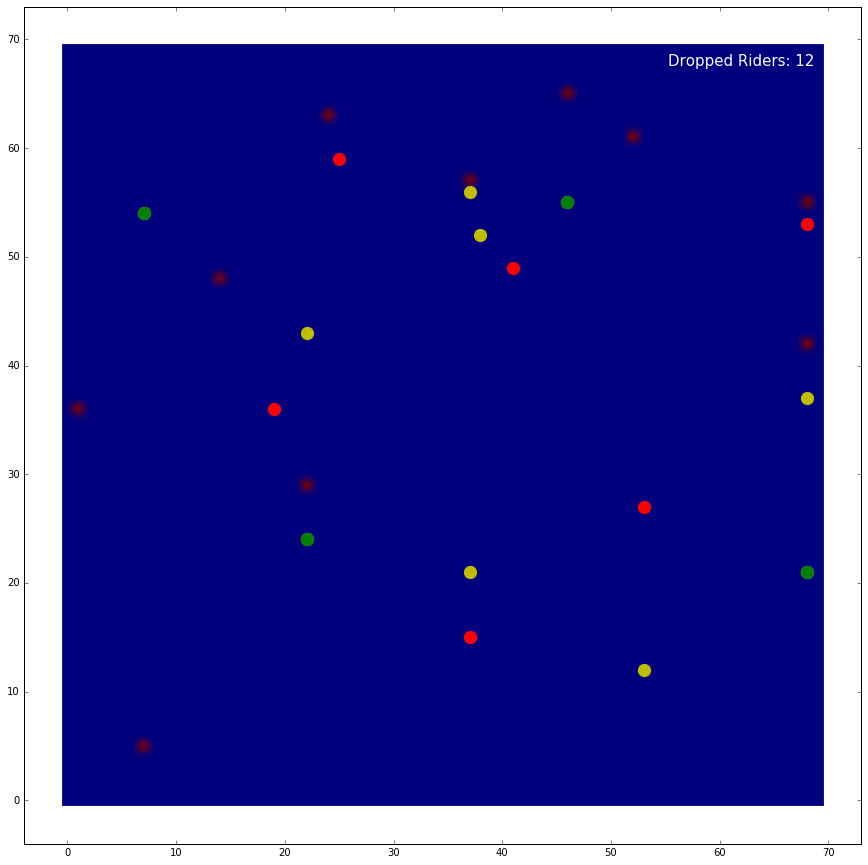

Wait times were [5, 23, 16, 10, 17, 18, 24, 12]
Ride times were [0, 5, 0, 56, 49, 41, 30, 50]
Dropped riders: 12


In [3]:
#actually run one example of the model with animation
from UberModel import run
%matplotlib inline
w, r, d = run()

print("Wait times were", w)
print("Ride times were", r)
print("Dropped riders:", d)

---

## 4. The Experiments

Due to the flexibility afforded to us by our OOP approach, we can easily run more than one experiment. In the first experiment, we will hold the amount of drivers constant and vary the probability a passenger will spawn as a proxy of 'busyness'. So the indpendent variable will be the busyness, and the dependent variables will be both wait time and ride time. In the second, we will hold the busyness constant and vary the amount of drivers available to serve. Here, the dependent variables stay the same but the independent variable will be the drivers. We think that observing the relationships between these variables will provide some rudimentary insight into how the real world works.

### Experimental procedure

To combat confounding variables such as randomness, we will be iterating every model 500 increments to allow for a sufficient progression of the model to average out inconsistencies. Driver spawn points are chosen in the beginning and new drivers do not spawn, so the spacing of the initial spawn point may have a significant. So, for each step in the variation we will run the model 5 times to account for the randomness of driver spawn points.

What follows is a generalized function for conducting experiments with this model. The default parameters are borrowed from the default parameters of `run()`. The new parameters, something, something, and something, will give the experimenter the ability to quickly and easily adjust the parameters of the experiment.

### The Experiment Function

In [5]:
from UberModel import experiment

#### `experiment(independent_variable = '', IV_vals = [], x_dim = 70, y_dim = 70, iterations = 100, vis = False):`  

The `experiment` function conducts the experiment of the given parameters on the UberModel, and returns the data of the experiment in a form that makes analysis and plotting easy.

From the parameters of the experiment function, the experimenter can choose the independent variable of the experiment and the values of the independent variable tested. It also allows the experimenter to adjust the parameters of the `run()` function by passing the respective parameters in to be inherited by `run()`.

When the experimenter sets `independent_variable = 'driver'` the function will then check to see if the users inputs for `IV_vals = []` make sense - the values must be positive integers as having partial or negative drivers is impossible. It then utilizes a `for` loop iterating over each value of `IV_vals` and collecting the data. It should be noted that `vis = False` by default so as to speed up the experimentation process - at this point we are not interested in the visuals.

This function returns 4 objects: `IV_vals`, `wait_times_per_IV`, `ride_times_per_`, and `dropped_riders_per_IV`.

### Experiment 1: Varying busyness

**Parameters of the experiment:**  
* Independent Variable:  
    * The **probability a rider spawns** on an iteration of the model, as a proxy of 'busyness'.  
* Dependent Variables:  
    * Rider wait time measured in iterations, as a proxy for minutes elapsed  
    * Rider ride time measured likewise.
* Controlled:  
    * Number of drivers  
    * Driver behavior  
    * Rider behavior  
    * Board size
    
#### Experiment 1 Hypothesis
* We hypothesize that as busyness increases rider wait time will decrease. When there are more drivers spread across the board, drivers will be closer to riders more often.  
* Since ride time should be a function of random distance, we predict that there will be no causal effect of busyness on ride times.  
* As there are more riders, there will need to be more drivers to occupy all of them, thus increasing rider drops.

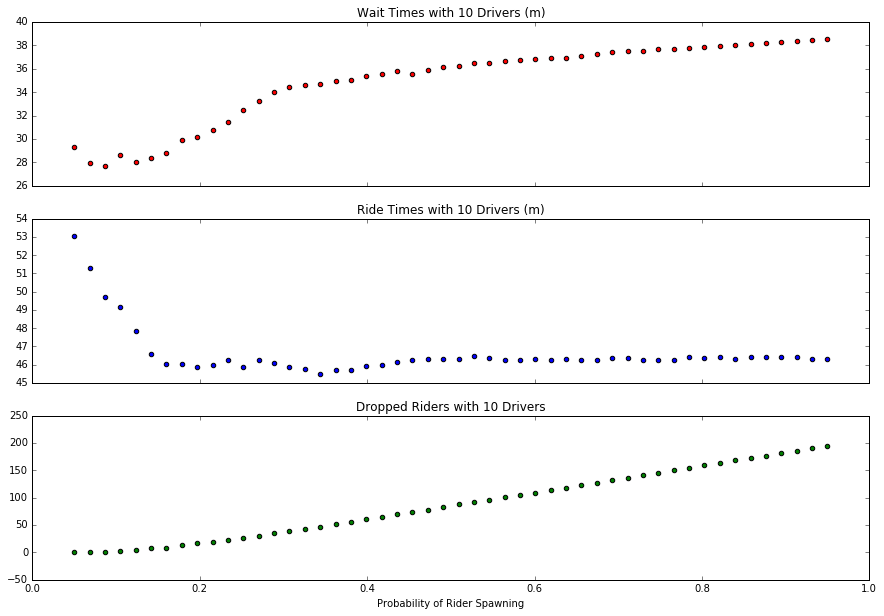

In [90]:
# Conducting experiment 1.
from UberModel import experiment
import numpy as np

prob_vals = np.linspace(.05,.95, 50) # creating 50 values of the independent variable
IV_vals, waits, rides, drops = experiment(independent_variable = 'rider', IV_vals = prob_vals, \
                                          x_dim = 70, y_dim = 70, iterations = 500, vis = False)

# print("IVV:", IV_vals)
# print("Waits:", [round(w,1) for w in waits])
# print("Rides:", [round(r,1) for r in rides])
# print("Drops:", [round(d,1) for d in drops])       # Uncomment these lines if you would like to see raw data

import matplotlib.pyplot as plt
%matplotlib inline

# Plot all the results of the experiments together on the same x-axis, the independent variable of drivers
f, axarr = plt.subplots(3, sharex=True, figsize = [15,10])
axarr[0].scatter(IV_vals, waits, marker = 'o', c = "r")
axarr[0].set_title('Wait Times with 10 Drivers (m)')

axarr[1].scatter(IV_vals, rides)
axarr[1].set_title('Ride Times with 10 Drivers (m)')

axarr[2].scatter(IV_vals, drops, c = "g")
axarr[2].set_title('Dropped Riders with 10 Drivers')
axarr[2].set_xlabel('Probability of Rider Spawning')

### Experiment 2: Varying driver amount

**Parameters of the experiment:**  
* Independent Variable:  
    * The **number of drivers** active from the beginning to the end of a run. 
* Dependent Variables:  
    * Rider wait time measured in iterations, as a proxy for minutes elapsed.  
    * Rider ride time measured likewise.
* Controlled:  
    * Number of drivers  
    * Driver behavior  
    * Rider behavior  
    * Board size
    
#### Experiment 2 Hypotheses  
* We hypothesize that as driver amount increases rider wait time will decrease. When there are more drivers spread across the board, drivers will be closer to riders more often.  
* Since ride time should be a function of random distance, we predict that there will be no causal effect of drivers and ride times.  
* As there are more drivers, there will need to be more passengers to occupy all of them, thus reducing rider drops.

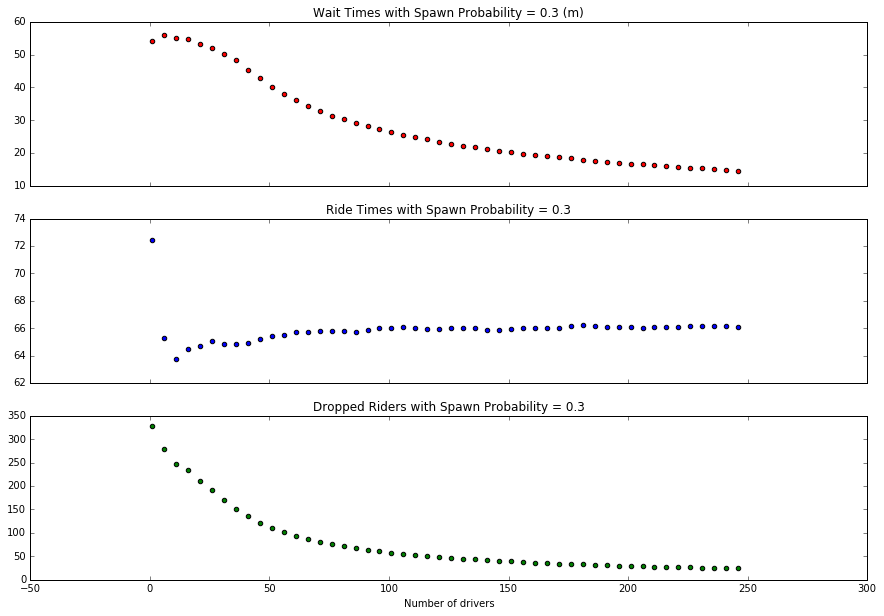

In [89]:
#Conducting Experiment 2
driver_vals = range(1,250, 5)

IV_vals, waits, rides, drops = experiment(independent_variable = 'driver', IV_vals = driver_vals, \
                                          x_dim = 100, y_dim = 100, iterations = 1000, vis = False)


# print("IVV:", IV_vals)
# print("Waits:", [round(w,1) for w in waits])
# print("Rides:", [round(r,1) for r in rides])
# print("Drops:", [round(d,1) for d in drops])


import matplotlib.pyplot as plt
%matplotlib inline

# plot all the results of the experiments together on the same x-axis, the independent variable of drivers
f, axarr = plt.subplots(3, sharex=True, figsize = [15,10])
axarr[0].scatter(IV_vals, waits, marker = 'o', c = "r")
axarr[0].set_title('Wait Times with Spawn Probability = 0.3 (m)')

axarr[1].scatter(IV_vals, rides)
axarr[1].set_title('Ride Times with Spawn Probability = 0.3')

axarr[2].scatter(IV_vals, drops, c = "g")
axarr[2].set_title('Dropped Riders with Spawn Probability = 0.3')
axarr[2].set_xlabel('Number of drivers')


## 5. Discussion of Results


Something.

## 6. Potential Additions

The potential of a simulation like this is extraordinary. When data science teams at Uber or Lyft are in deliberations as to whether or not they should try a new experiment, they could run the experiment on a simulation to help form a hyopthesis.

So far we have only focused on the physical process of picking up and dropping off a passenger, but what about the financial side? Uber currently calculates the price of a fare with a several inputs, including an initial cost, distance covered, time elspased, and perhaps most notably, the real-time supply of drivers and demand of drivers. In basic economic principle, the price of a good is found as a function of supply and demand. As supply goes up, price goes down, and as demand goes up, price goes up. Uber leverages their precise data to accurately optimize a ride fare to maximize profit. **Using our model as a base, one could implement a rudimentary pricing algorithm and see how the cost of a fare responds to different condtions.**


For example, in 2015, the Mayor of New York City, Bill de Blasio, moved to to regulate Uber in response to pressure from the Taxi industry. He wanted to hard-cap the amount of drivers Uber could have on the road. In response, Uber pushed a new feature out to their apps in NYC called the 'di Blasio' tab. When a user was waiting for their ride and clicked this tab, they were shown actual estimates and figures about the significantly increased wait time for their ride. The tab included a button to send an email to Mayor di Blasio stating that you stand against this regulation, and it worked as the Mayor eventually backed down. With our model, one could observe the relationship between a hard capped taxi limit and the increased wait time, and extrapolate it to the current real world data that they currently have. This way, they could **make an educated guess at the consequences of such an action without actually doing it.**

Uber has also innovated on the traditional cab service by novel introducing services to such as on-demand carpooling. UberPOOL will optimize a driver's route to pick up multiple people in an area that are heading in the same general direction. 'An area' and 'general direction' are both vague terms, so how would data scientists at Uber figure out the optimal maximum areas that a driver would travel within to pick up a new rider? With a simulation, **they could model the effects of drivers going 1, 2, 5 miles out of their way to pick up an additional passenger.** How would that effect ride times and wait times? How does a driver choose in what order to drop off passengers to optimize efficiency?

These are just a few of the potential features we could add to make the model more compelling and powerful. Luckily, by using programming paradigms such as OOP and Agent Based Modeling, we have created a base that will be easy to tweak and iterate upon. This kind of Agent Based model could serve as inspiration for other services where both the workforce and customer base is in flux with seasonality, such as Airbnb.